In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brand-sentiment-analysis-dataset/Dataset - Train.csv
/kaggle/input/brand-sentiment-analysis-dataset/Dataset - Test.csv
/kaggle/input/brand-sentiment-analysis-dataset/Dataset Card.csv


In [2]:
import pandas as pd

df_train = pd.read_csv('/kaggle/input/brand-sentiment-analysis-dataset/Dataset - Train.csv')
df_test = pd.read_csv('/kaggle/input/brand-sentiment-analysis-dataset/Dataset - Test.csv')

df_train.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
df_test

,Tweet
0,Hand-Held ���Hobo�۪: Drafthouse launches ���Ho...
1,Again? RT @mention Line at the Apple store is ...
2,Boooo! RT @mention Flipboard is developing an ...
3,Thanks to @mention for publishing the news of ...
4,���@mention &quot;Apple has opened a pop-up st...
...,...
499,Hey is anyone doing #sxsw signing up for the g...
500,@mention you can buy my used iPad and I'll pic...
501,@mention You could buy a new iPad 2 tmrw at th...
502,"Guys, if you ever plan on attending #SXSW, you..."


And now, we start analyse the test data. First, we have to check missing values

In [4]:
df_test.isna().sum()

Tweet    0
dtype: int64

There is no missing values. It is good to know. And now we have to check the 'tweet_text' column is properly formatted

In [5]:
import pandas as pd

df_test = pd.read_csv('/kaggle/input/brand-sentiment-analysis-dataset/Dataset - Test.csv')
import re


df_test['Tweet'] =df_test['Tweet'].str.lower()
df_test['Tweet'] = df_test['Tweet'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+|\@\w+|\#', '', x, flags=re.MULTILINE))
df_test['Tokens'] = df_test['Tweet'].apply(lambda x: re.findall(r'\b\w+\b', x))

df_test.head()
 

,Tweet,Tokens
0,hand-held ���hobo�۪: drafthouse launches ���ho...,"[hand, held, hobo, drafthouse, launches, hobo,..."
1,again? rt line at the apple store is insane.....,"[again, rt, line, at, the, apple, store, is, i..."
2,boooo! rt flipboard is developing an iphone v...,"[boooo, rt, flipboard, is, developing, an, iph..."
3,thanks to for publishing the news of new med...,"[thanks, to, for, publishing, the, news, of, n..."
4,��� &quot;apple has opened a pop-up store in a...,"[quot, apple, has, opened, a, pop, up, store, ..."


And now we are going to find the most common words

In [6]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string

df_test['Tokens'] = df_test['Processed_Tweet'].apply(word_tokenize)

stop_words = set(stopwords.words('english'))
df_test['Tokens'] = df_test['Tokens'].apply(lambda x: [word for word in x if word.isalnum() and word not in stop_words])

all_tokens = [token for sublist in df_test['Tokens'] for token in sublist]

freq_dist = FreqDist(all_tokens)

# Display the most common words
print("Top 10 most frequent words:")
print(freq_dist.most_common(10))


KeyError: 'Processed_Tweet'

In [7]:
df_test['Tokens'].describe()

count                                                   504
unique                                                  504
top       [hand, held, hobo, drafthouse, launches, hobo,...
freq                                                      1
Name: Tokens, dtype: object

Let's now visualize Tweet lengths

In [8]:
df_test['Tweet_length'] = df_test['Tokens'].apply(len)
df_test['Tweet_length']

0      13
1      10
2      12
3      18
4      24
       ..
499    28
500    14
501    17
502    21
503    25
Name: Tweet_length, Length: 504, dtype: int64

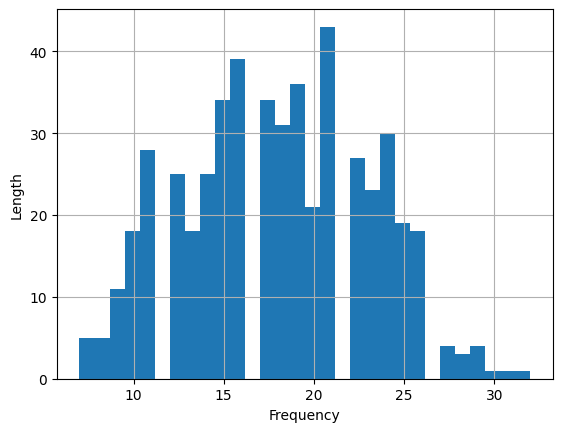

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df_test['Tweet_length'], bins = 30)
plt.xlabel('Frequency')
plt.ylabel('Length')
plt.grid(True)
plt.show()

And now we are going to analyze the train dataset

In [10]:
df_train = pd.read_csv('/kaggle/input/brand-sentiment-analysis-dataset/Dataset - Train.csv')
df_train.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


We replace column names to make it easier to work with

In [11]:
df_train.columns =df_train.columns.str.replace('emotion_in_tweet_is_directed_at', 'product', regex = True)
df_train.columns =df_train.columns.str.replace('is_there_an_emotion_directed_at_a_brand_or_product', 'emotion', regex = True)
df_train.head()

,tweet_text,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Let's just check the number of iPhone tweets vc other tweets

In [12]:
iphone_count = df_train['product'].eq('iPhone').sum()

other_products = df_train['product'].ne('iPhone').sum()

print(len(iphone_number))
print(other_products)


NameError: name 'iphone_number' is not defined

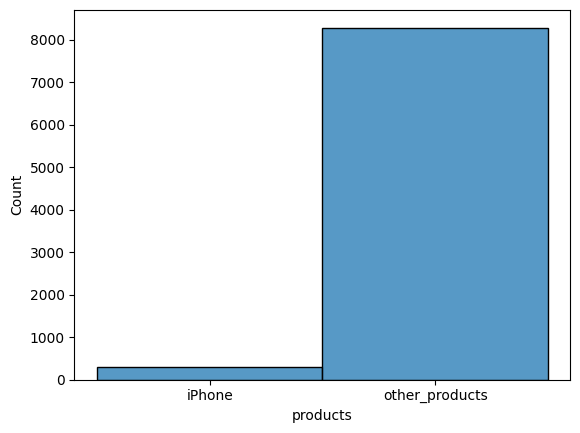

In [13]:
plot_df = pd.DataFrame({'products': ['iPhone', 'other_products'],
                      'sum': [iphone_count, other_products]})

sns.histplot(data = plot_df, x=  'products', weights = 'sum', bins =2)
plt.show()

In [14]:
df_train.head()

,tweet_text,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Sentiment analysis of the train data

In [15]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

df_train['tweet_text'] = df_train['tweet_text'].astype(str).str.lower()

sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each tweet and create a new column 'sentiment_score'
df_train['sentiment_score'] = df_train['tweet_text'].apply(lambda x: sid.polarity_scores(x)['compound'] if isinstance(x, str) else None)

# Map sentiment scores to categories (Positive, Neutral, Negative)
df_train['sentiment'] = df_train['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative') if pd.notnull(x) else None)

# Display the updated DataFrame
print(df_train[['tweet_text', 'sentiment_score', 'sentiment']].head())


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


                                          tweet_text  sentiment_score  \
0  .@wesley83 i have a 3g iphone. after 3 hrs twe...          -0.6800   
1  @jessedee know about @fludapp ? awesome ipad/i...           0.9100   
2  @swonderlin can not wait for #ipad 2 also. the...           0.0000   
3  @sxsw i hope this year's festival isn't as cra...           0.7269   
4  @sxtxstate great stuff on fri #sxsw: marissa m...           0.6249   

  sentiment  
0  Negative  
1  Positive  
2   Neutral  
3  Positive  
4  Positive  


Checking what is the accuracy of our model

In [16]:
emotion_toSentiment = {'Negative emotion': 'Negative', 'Positive emotion': 'Positive', 'Neutral emotion': 'Neutral'}

df_train['true_sentiment'] = df_train['emotion'].map(emotion_toSentiment)

In [17]:
from sklearn.metrics import accuracy_score

df_train_sentiment = df_train.dropna(subset=['true_sentiment', 'sentiment'])

accuracy = accuracy_score(df_train_sentiment['true_sentiment'], df_train_sentiment['sentiment'])

print(accuracy)

0.5806957066750235
